## Set things up:

General Python and Keras imports:

In [1]:
# Larger CNN for the MNIST Dataset
import numpy
import random
import matplotlib.pyplot as plt 
import git
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


Import the neural net from the local file, as generated by GiraffeTools:

In [2]:
from GIRAFFE.code.neural_net import NeuralNet

Some constants and initialisations

In [3]:
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Load data:

Load data from MNIST standard data set:

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

This is what the data looks like:

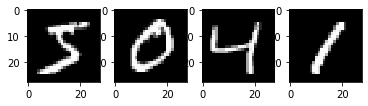

In [5]:
# plot 4 images as gray scale
dimensions = list(X_train[0].shape)[1:]
plt.subplot(141)
plt.imshow(X_train[0].reshape(dimensions), cmap=plt.get_cmap('gray'))
plt.subplot(142)
plt.imshow(X_train[1].reshape(dimensions), cmap=plt.get_cmap('gray'))
plt.subplot(143)
plt.imshow(X_train[2].reshape(dimensions), cmap=plt.get_cmap('gray'))
plt.subplot(144)
plt.imshow(X_train[3].reshape(dimensions), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## The neural network bit:

Grab the model (imported as 'NeuralNet') and initialise it with the shape of our data

In [6]:
# build the model
model = NeuralNet(y_test.shape[1])

Compile and run the model

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Save logs in this folder under the current git hash
repo = git.Repo(search_parent_directories=True)
sha = repo.head.object.hexsha
logdir="logs/" + sha
# Fit the model
fit = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_test, y_test), 
        epochs=10, 
        batch_size=200,
        callbacks=[TensorBoard(log_dir=logdir)]
 )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.3865 - acc: 0.8819 - val_loss: 0.0867 - val_acc: 0.9724
Epoch 2/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.0981 - acc: 0.9703 - val_loss: 0.0551 - val_acc: 0.9817
Epoch 3/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0720 - acc: 0.9775 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 4/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.0592 - acc: 0.9818 - val_loss: 0.0366 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.0509 - acc: 0.9837 - val_loss: 0.0362 - val_acc: 0.9885
Epoch 6/10
60000/600

Hohum, see here the scores of the network:

In [8]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.85%


## Proof it's working:

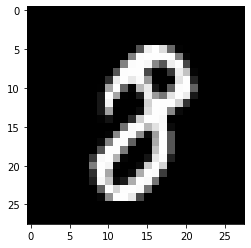

In [11]:
# plot random image
random_number = random.randrange(0, X_test.shape[0])
dimensions = list(X_test[random_number].shape)[1:]
plt.imshow(X_test[random_number].reshape(dimensions), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

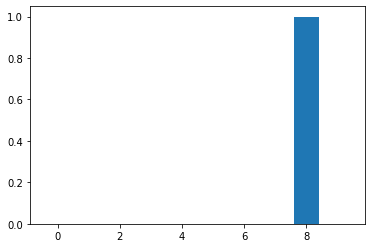

In [12]:
prediction = model.predict(X_test[random_number].reshape(1,1,28,28))
result = plt.bar(list(range(10)), prediction[0])
result.set_label(list(range(10)))